In [51]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [52]:
detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eyedetector = cv2.CascadeClassifier('haarcascade_eye.xml')

In [62]:
def plt_show(image, title="", gray = False, size =(100,100)):
    temp = image
    if gray == False:
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
        plt.title(title)
        plt.imshow(temp, cmap='gray')
        plt.show()
        

In [82]:
def detect_faces(img):
    temp = img
    gray = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    faces = detector.detectMultiScale(img)
    print("number of faces detect:"+str(len(faces)))
    print("faces:"+str(faces))
    for face in faces:
        (x,y,w,h) = face
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+h]
        cv2.rectangle(temp, (x,y), (x+w,y+h), (0,255,0), 3)
        eyes = eyedetector.detectMultiScale(roi_gray)
        print("number of eyes detected:"+str(len(eyes)))
        print("eyes:"+str(eyes))
        for eye in eyes:
            [ex, ey, ew, eh] = eye
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,0,255), 3)
        
        
    plt_show(temp)

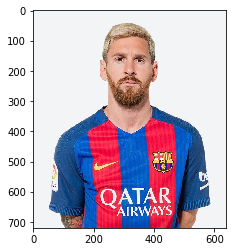

number of faces detect:1
faces:[[222  87 192 192]]
number of eyes detected:2
eyes:[[ 43  54  44  44]
 [104  55  47  47]]


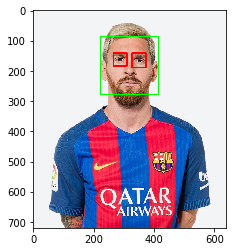

In [83]:
img = cv2.imread("1.jpg")
plt_show(img)
detect_faces(img)

In [84]:
import imutils

def get_webcam_image():
    camera = cv2.VideoCapture(0)
    cv2.waitKey(10)
    retval, im = camera.read()
    return im
    

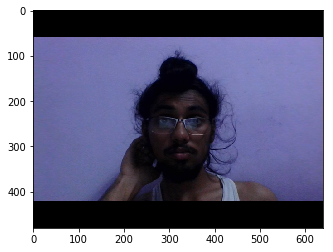

number of faces detect:2
faces:[[188 351  45  45]
 [234 163 184 184]]
number of eyes detected:0
eyes:()
number of eyes detected:1
eyes:[[29 47 57 57]]


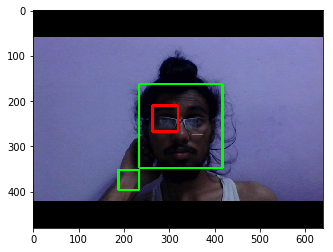

In [85]:
saycheese = get_webcam_image()

plt_show(saycheese)
detect_faces(saycheese)